### Import your data into a Pandas DataFrame.

### Merge your DataFrames.

### Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

### Determine the mean, median, and mode for the following:

    #### The total number of rides for each city type.

    #### The average fares for each city type.

    #### The total number of drivers for each city type.

### Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:

    #### The number of rides for each city type.

    #### The fares for each city type.

    #### The number of drivers for each city type.

### Create a pie chart that visualizes each of the following data for each city type:

    #### The percent of total fares.

    #### The percent of total rides.

    #### The percent of total drivers.


In [2]:
%matplotlib inline

In [3]:
#Import your data into a Pandas DataFrame and add dependincies
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [4]:
#Actually Reading in the csv files
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#Merge cells only related column is city and ride data has more rows so I should be adding city data to ride data
#Database to the rescue merge left is similar to left join in SQL

#https://stackoverflow.com/questions/27556377/pandas-combine-data-frames-of-different-sizes

pyber_data_df = ride_data_df.merge(city_data_df, on='city', how='left').copy()
pyber_data_df.head()

#or I could've just followed along
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"], how='left')


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [18]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## The two following cells were my attempt without following the directions

In [19]:
#Create a bubble chart that showcases the average fare versus the total number of rides 
#with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
#Group by city type and then by city to get get 
# number of drivers per city is already stored in city_data_df

#GroupedData1_obj = pyber_data_df.groupby(['type', 'city'])

#GroupedData1_df = GroupedData1_obj['fare'].mean()
#copy1_df = GroupedData1_df.reset_index()

#GroupedData2_df = GroupedData1_obj['ride_id'].count()
#copy2_df = GroupedData2_df.reset_index()

#GroupedData3_df = GroupedData1_obj['driver_count'].first()
#copy3_df = GroupedData3_df.reset_index()

#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"], how='left')

#BigGroup_df = pd.merge(pd.merge(copy1_df, copy2_df, left_on=['type', 'city'], right_on=['type', 'city'], how='left'), copy3_df, left_on=['type', 'city'], right_on=['type', 'city'], how='left')
#BigGroup_df.head()

In [20]:
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Rural','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Rural','fare'],
#                    label = 'Rural',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Rural','driver_count']], 
#                    color='yellow', marker = 'o', edgecolor = 'black')
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Urban','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Urban','fare'],
#                    label = 'Urban',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Urban','driver_count']],
#                    color = 'red', marker = 'o', edgecolor = 'black')
#plt.scatter(BigGroup_df.loc[BigGroup_df['type']=='Suburban','ride_id'],
#                    BigGroup_df.loc[BigGroup_df['type']=='Suburban','fare'],
#                    label = 'Suburban',
#                    s=[BigGroup_df.loc[BigGroup_df['type']=='Suburban','driver_count']],
#                    color = 'blue', marker = 'o', edgecolor = 'black')

#plt.legend()
#plt.grid()
#plt.show()


## Back to following directions

In [21]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [24]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

In [25]:
# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()

In [26]:
# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()

In [27]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
#urban_avg_fare.head()

In [28]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
#suburban_avg_fare.head()

In [29]:
# Get average fare for each city in the urban cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
#rural_avg_fare.head()

In [42]:
# Get the average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

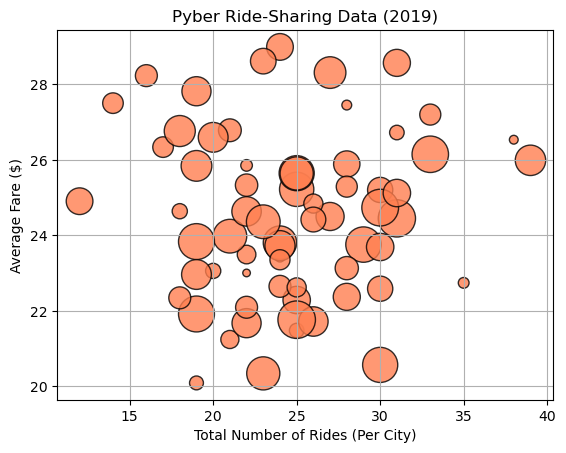

In [31]:
# Build the scatter plots for all cities.
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

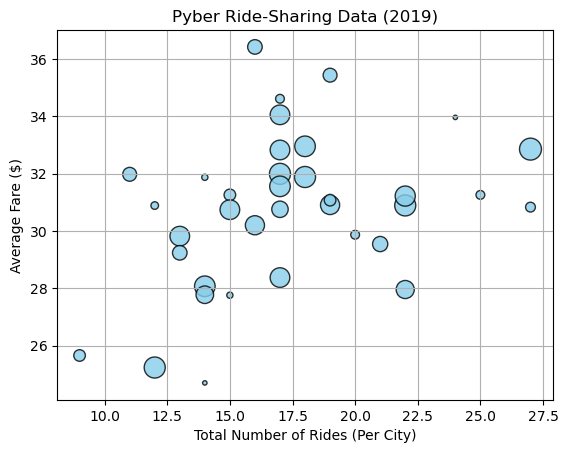

In [32]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

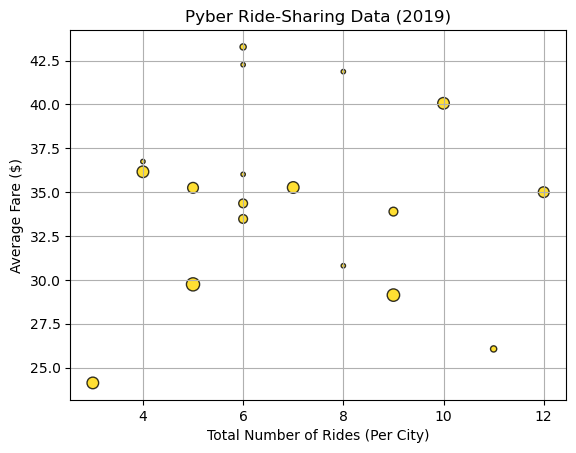

In [33]:
plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend

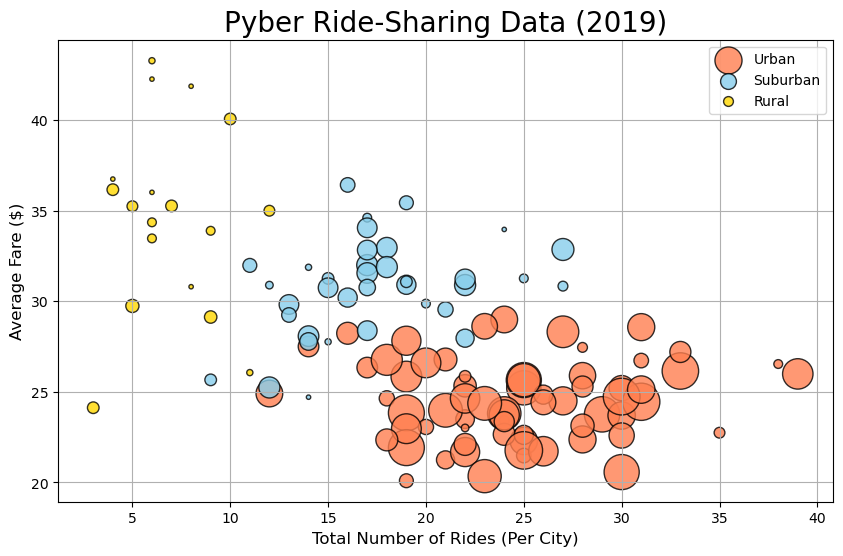

In [34]:
#now plot all together
plt.figure(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.grid(True)

plt.legend()

plt.show()

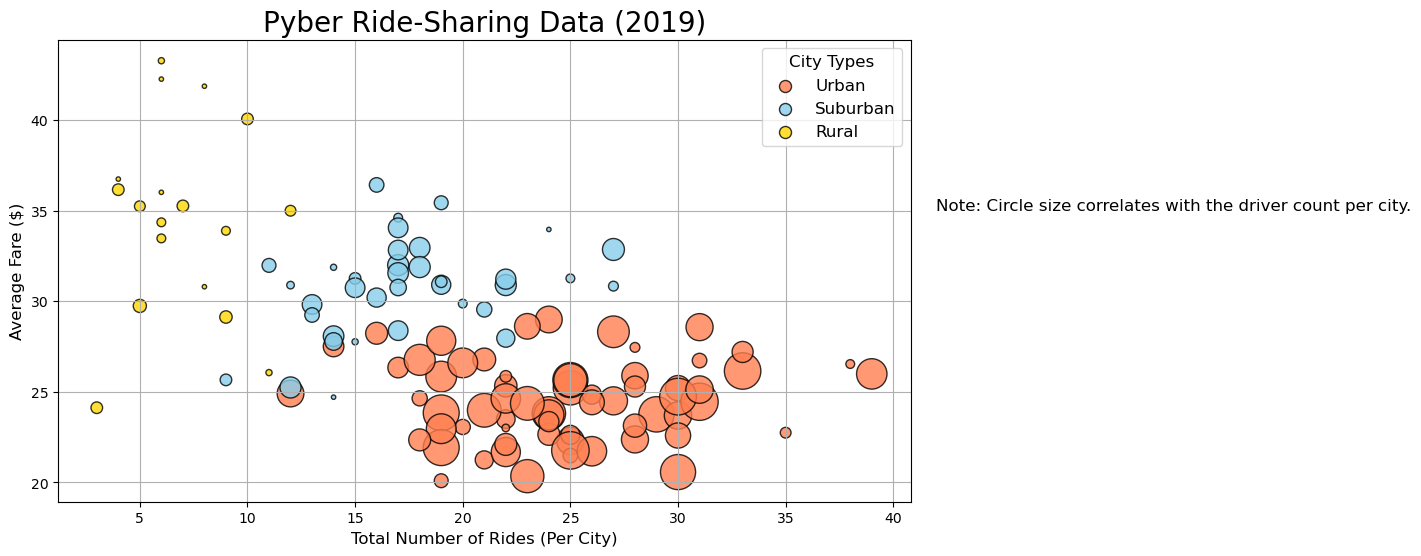

In [35]:
plt.figure(figsize=(11,6))
plt.scatter(urban_ride_count, urban_avg_fare, label='Urban', 
            s=10*urban_driver_count, color = 'coral', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban', 
            s=10*suburban_driver_count, color = 'skyblue', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.scatter(rural_ride_count, rural_avg_fare, label='Rural', 
            s=10*rural_driver_count, color = 'gold', edgecolor = 'black',
            linewidths=1, alpha = .8)

plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Adding Note for size correlation, notice atht fontsize here uses a string.
#I've left it as a string to highlight that it can be done this was but a number works fine too
plt.text(42, 35, 'Note: Circle size correlates with the driver count per city.', fontsize = '12', wrap=True)

#save the image
plt.savefig('analysis/Fig1.png')
#plt.show()

In [36]:
# Get summary statistics for Urban Cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [37]:
# Get summary statistics for Suburban Cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [39]:
# Get summary statistics for Rural Cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [46]:
# Get summary statistics of Urban Cities
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [43]:
# Get summary statistics of Suburban Cities
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [44]:
# Get summary statistics of Rural Cities
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [47]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [48]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [49]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [50]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [51]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64

In [52]:
# Import NumPy and the stats module from SciPy.
# NumPy was imported at top
import scipy.stats as sts

In [53]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [54]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [55]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [57]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [58]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [62]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_urban_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $24.53.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [64]:
# Get the driver counts for the urban cities.
urban_drivers = urban_cities_df['driver_count']

# Calculate the measures of central tendency for the urban cities driver counts.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the number of drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is 36.68.
The median number of drivers in urban cities is 37.00.
The mode for the number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).


In [65]:
# Get the driver counts for the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

# Calculate the measures of central tendency for the suburban cities driver counts.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the number of drivers in suburban cities is {mode_suburban_drivers}.")

The mean number of drivers in suburban cities is 13.71.
The median number of drivers in suburban cities is 16.00.
The mode for the number of drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [66]:
# Get the driver counts for the rural cities.
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the rural cities driver counts.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the number of drivers in rural cities is {mode_rural_drivers}.")

The mean number of drivers in rural cities is 4.30.
The median number of drivers in rural cities is 4.00.
The mode for the number of drivers in rural cities is ModeResult(mode=array([1]), count=array([32])).


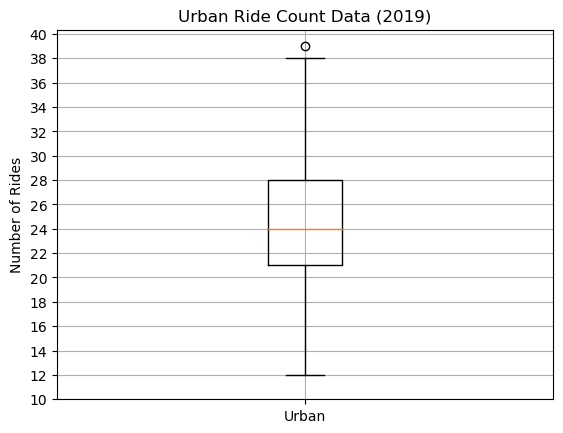

In [73]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Urban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
#plt.show()

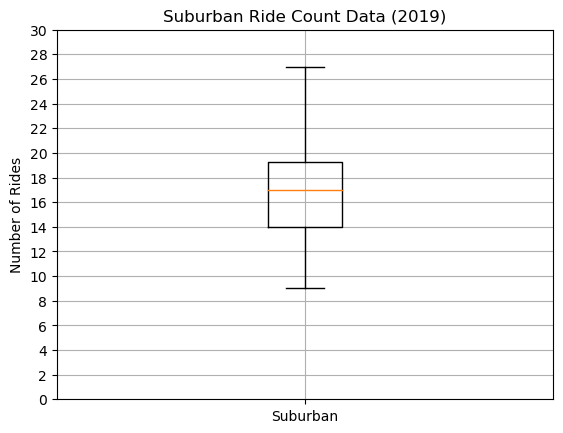

In [74]:
# Create a box-and-whisker plot for the urban cities ride count.
xs_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=xs_labels)
# Add the title, y-axis label and grid.
ax.set_title('Suburban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
#plt.show()

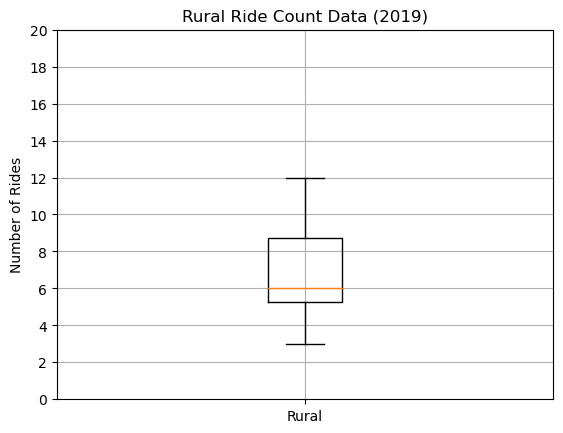

In [75]:
# Create a box-and-whisker plot for the urban cities ride count.
xr_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=xr_labels)
# Add the title, y-axis label and grid.
ax.set_title('Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid()
#plt.show()

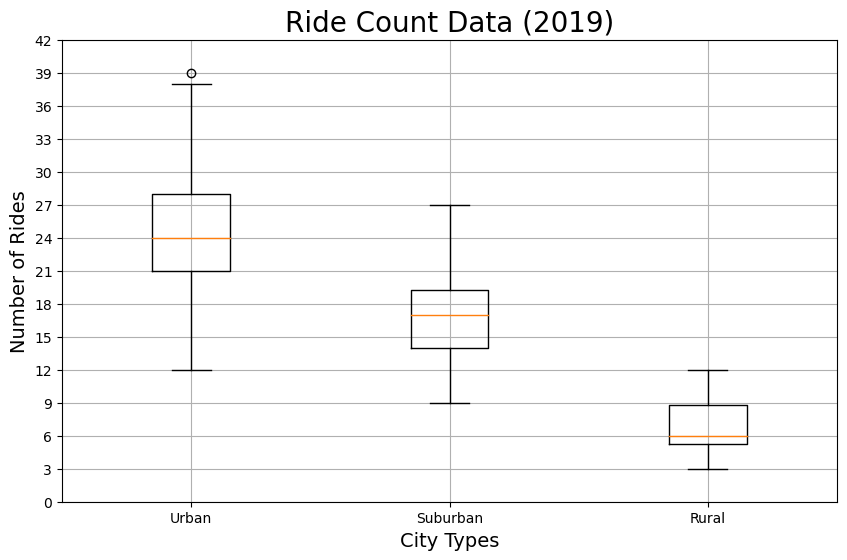

In [76]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
#plt.show()

In [77]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


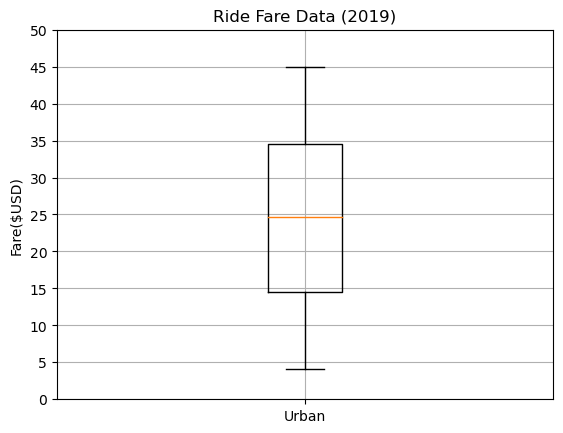

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [78]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Urban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

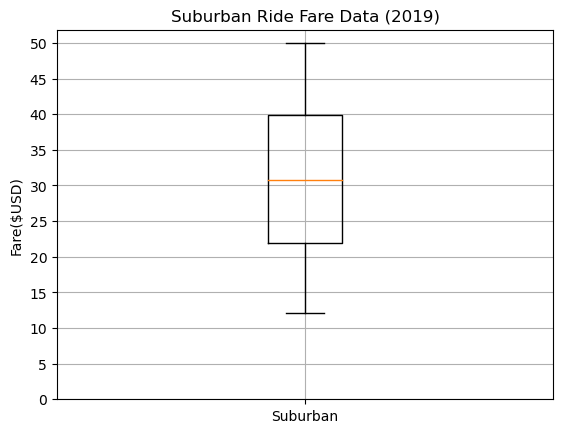

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [79]:
# Create a box-and-whisker plot for the suburban fare data.
xs_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=xs_labels)
# Add the title, y-axis label and grid.
ax.set_title('Suburban Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

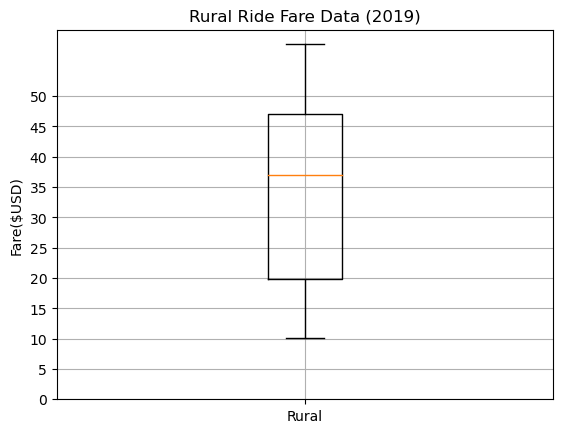

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [80]:
# Create a box-and-whisker plot for the suburban fare data.
xr_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=xr_labels)
# Add the title, y-axis label and grid.
ax.set_title('Rural Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

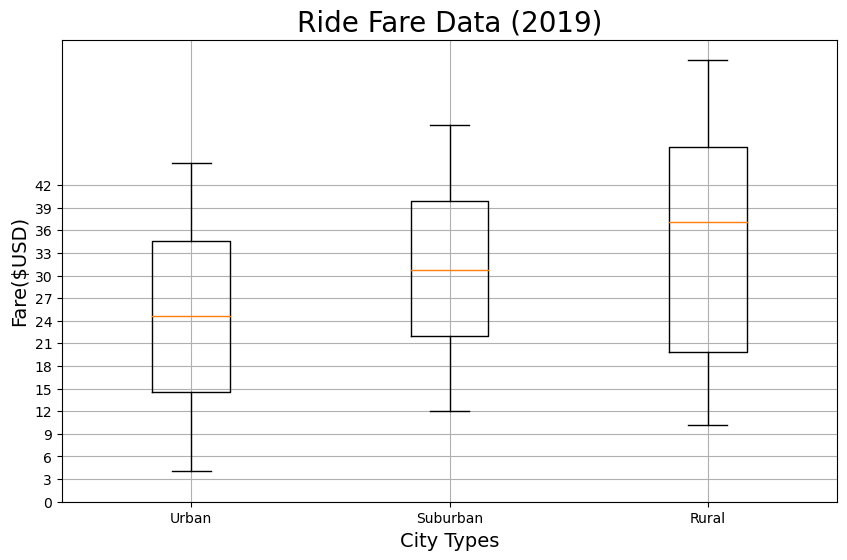

In [81]:
x_labels = ["Urban", "Suburban","Rural"]
fare_average_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_average_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
#plt.show()

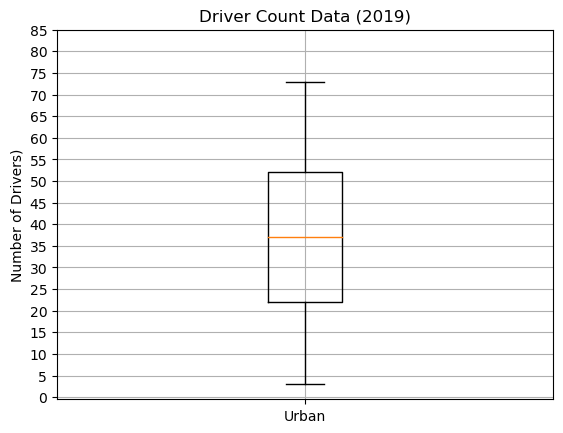

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [82]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Urban Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

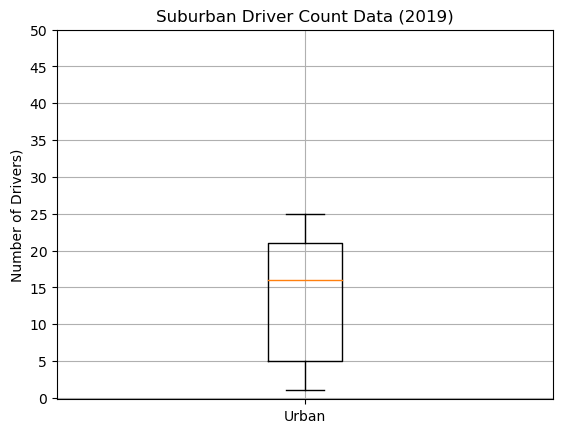

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [85]:
# Create the box-and-whisker plot for the suburban driver count data.
xs_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Suburban Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

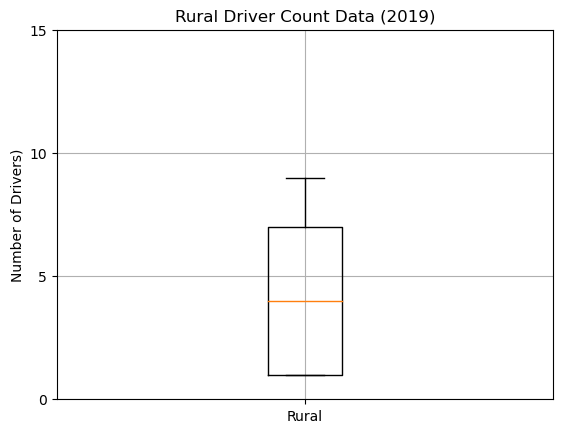

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [87]:
# Create the box-and-whisker plot for the rural driver count data.
xr_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=xr_labels)
# Add the title, y-axis label and grid.
ax.set_title('Rural Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 16, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

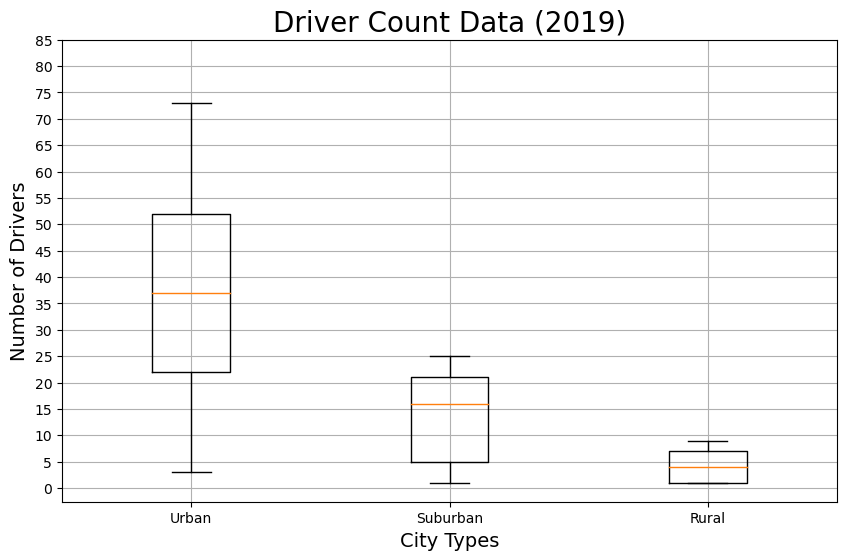

In [89]:
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
#plt.show()